In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df1=pd.read_csv("credit.csv")
df1.head(10)

Loan ID                           Customer ID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  e777faab-98ae-45af-9a86-7ce5b33b1011   
4  d4062e70-befa-4995-8643-a0de73938182  81536ad9-5ccf-4eb8-befb-47a4d608658e   
5  89d8cb0c-e5c2-4f54-b056-48a645c543dd  4ffe99d3-7f2a-44db-afc1-40943f1f9750   
6  273581de-85d8-4332-81a5-19b04ce68666  90a75dde-34d5-419c-90dc-1e58b04b3e35   
7  db0dc6e1-77ee-4826-acca-772f9039e1c7  018973c9-e316-4956-b363-67e134fb0931   
8  8af915d9-9e91-44a0-b5a2-564a45c12089  af534dea-d27e-4fd6-9de8-efaa52a78ec0   
9  0b1c4e3d-bd97-45ce-9622-22732fcdc9a0  235c4a43-dadf-483d-aa44-9d6d77ae4583   

   Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0   Fully Paid             445412.0  Short Term         709.0      1167493.0   
1   Fully Paid             262328.0  Short Term           NaN            NaN   
2   Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3   Fully Paid             347666.0   Long Term         721.0       806949.0   
4   Fully Paid             176220.0  Short Term           NaN            NaN   
5  Charged Off             206602.0  Short Term        7290.0       896857.0   
6   Fully Paid             217646.0  Short Term         730.0      1184194.0   
7  Charged Off             648714.0   Long Term           NaN            NaN   
8   Fully Paid             548746.0  Short Term         678.0      2559110.0   
9   Fully Paid             215952.0  Short Term         739.0      1454735.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   
5            10+ years  Home Mortgage  Debt Consolidation      16367.74   
6             < 1 year  Home Mortgage  Debt Consolidation      10855.08   
7             < 1 year  Home Mortgage           Buy House      14806.13   
8              2 years           Rent  Debt Consolidation      18660.28   
9             < 1 year           Rent  Debt Consolidation      39277.75   

   Years of Credit History  Months since last delinquent  \
0                     17.2                           NaN   
1                     21.1                           8.0   
2                     14.9                          29.0   
3                     12.0                           NaN   
4                      6.1                           NaN   
5                     17.3                           NaN   
6                     19.6                          10.0   
7                      8.2                           8.0   
8                     22.6                          33.0   
9                     13.9                           NaN   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                      6.0                        1.0                228190.0   
1                     35.0                        0.0                229976.0   
2                     18.0                        1.0                297996.0   
3                      9.0                        0.0                256329.0   
4                     15.0                        0.0                253460.0   
5                      6.0                        0.0                215308.0   
6                     13.0                        1.0                122170.0   
7                     15.0                        0.0                193306.0   
8                      4.0                 

In [3]:
df_srm=df1.dropna(axis=0, how='all') #srm=senza righe mancanti;
df_srm.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [4]:
df=df_srm.copy()
df.drop(df_srm.columns[[0,1,12]], axis="columns",  inplace=True) 
df.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0  Fully Paid             445412.0  Short Term         709.0      1167493.0   
1  Fully Paid             262328.0  Short Term           NaN            NaN   
2  Fully Paid           99999999.0  Short Term         741.0      2231892.0   
3  Fully Paid             347666.0   Long Term         721.0       806949.0   
4  Fully Paid             176220.0  Short Term           NaN            NaN   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0              8 years  Home Mortgage   Home Improvements       5214.74   
1            10+ years  Home Mortgage  Debt Consolidation      33295.98   
2              8 years       Own Home  Debt Consolidation      29200.53   
3              3 years       Own Home  Debt Consolidation       8741.90   
4              5 years           Rent  Debt Consolidation      20639.70   

   Years of Credit History  Number of Open Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
4                      6.1                     15.0   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
4                        0.0                253460.0             427174.0   

   Bankruptcies  Tax Liens  
0           1.0        0.0  
1           0.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
4           0.0        0.0

In [5]:
class_name = 'Loan Status'

In [6]:
Ownership= df["Home Ownership"].replace("HaveMortgage", "Home Mortgage")
Ownership.unique()
df["Home Ownership"]= Ownership
df["Home Ownership"].unique() #appare due volte Mortgage, quindi è stato sostituito cHave mortgage con home mortgage

df["Purpose"].unique() #apparte due volte il termine other, si deve sostituire
purpose=df["Purpose"].replace("other", "Other")  #sostituito
purpose.unique()
df["Purpose"]=purpose
df["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [7]:
def remove_missing_values(df):
    for column_name, nbr_missing in df.isna().sum().to_dict().items():
        if nbr_missing > 0:
            if column_name in df._get_numeric_data().columns:
                mean = df[column_name].mean()
                df[column_name].fillna(mean, inplace=True)
            else:
                mode = df[column_name].mode().values[0]
                df[column_name].fillna(mode, inplace=True)
    return df
df = remove_missing_values(df)

In [8]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [9]:
def get_numeric_columns(df):
    numeric_columns = list(df._get_numeric_data().columns)
    return numeric_columns
numeric_columns = get_numeric_columns(df)
numeric_columns

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [10]:
def get_features_map(feature_names, real_feature_names):
    features_map = defaultdict(dict)
    i = 0
    j = 0

    while i < len(feature_names) and j < len(real_feature_names):
        if feature_names[i] == real_feature_names[j]:
            features_map[j][feature_names[i]] = j
            i += 1
            j += 1
        elif feature_names[i].startswith(real_feature_names[j]):
            features_map[j][feature_names[i]] = j
            i += 1
        else:
            j += 1
    return features_map



In [11]:
def get_real_feature_names(rdf, numeric_columns, class_name):
    real_feature_names = [c for c in rdf.columns if c in numeric_columns and c != class_name]
    real_feature_names += [c for c in rdf.columns if c not in numeric_columns and c != class_name]
    return real_feature_names

def one_hot_encoding(df, class_name):
    dfX = pd.get_dummies(df[[c for c in df.columns if c != class_name]], prefix_sep='=')
    class_name_map = {v: k for k, v in enumerate(sorted(df[class_name].unique()))}
    dfY = df[class_name].map(class_name_map)
    df = pd.concat([dfX, dfY], axis=1)
    feature_names = list(dfX.columns)
    class_values = sorted(class_name_map)
    return df, feature_names, class_values
rdf = df.copy(deep=True)
df, feature_names, class_values = one_hot_encoding(df, class_name)
real_feature_names = get_real_feature_names(rdf, numeric_columns, class_name)
rdf = rdf[real_feature_names + (class_values if isinstance(class_name, list) else [class_name])]
features_map = get_features_map(feature_names, real_feature_names)

In [12]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Term=Long Term',
       'Term=Short Term', 'Years in current job=1 year',
       'Years in current job=10+ years', 'Years in current job=2 years',
       'Years in current job=3 years', 'Years in current job=4 years',
       'Years in current job=5 years', 'Years in current job=6 years',
       'Years in current job=7 years', 'Years in current job=8 years',
       'Years in current job=9 years', 'Years in current job=< 1 year',
       'Home Ownership=Home Mortgage', 'Home Ownership=Own Home',
       'Home Ownership=Rent', 'Purpose=Business Loan', 'Purpose=Buy House',
       'Purpose=Buy a Car', 'Purpose=Debt Consolidation',
       'Purpose=Educational Expenses', 'Purpose=Home Improvements',
       'Purpose=Medical Bills', 'Purpo

In [13]:
df.shape

(100000, 43)

In [14]:
index1 = np.random.choice( df.index,50000, replace=False)
df_h=df.drop(index=index1, axis=0)
df_h.shape

(50000, 43)

## normalizzazione

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [17]:
X.shape

(100000, 43)

##### Elbow's method

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

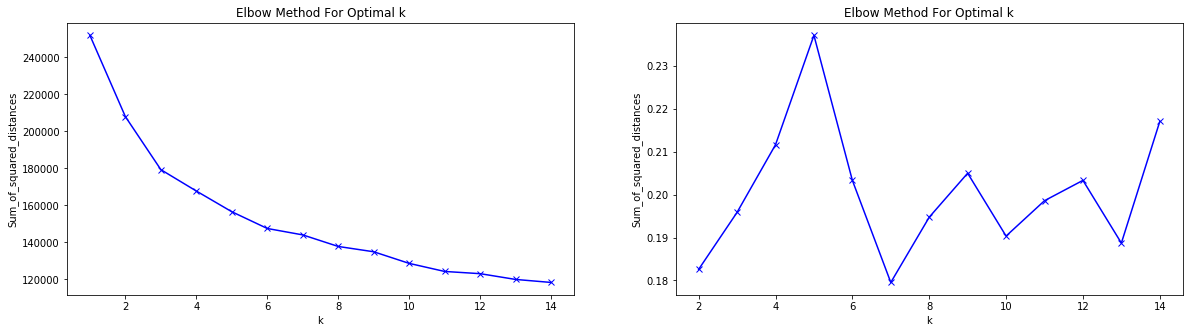

In [27]:
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()

# k-means

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [32]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
kmeans.labels_[:5]

array([1, 1, 0, 0, 2])

In [154]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([ 9182, 32438, 33005,  9309, 16066], dtype=int64))

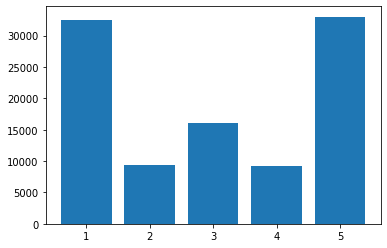

In [45]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))
x = np.linspace(1,5,5,endpoint=True)
plt.xticks(np.linspace(1,5
                       ,5,endpoint=True))
plt.bar(x,hist)
plt.show()



In [46]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))

SSE 156265.45157148872
Silhouette 0.23615314902193216


##### Best epsilon

In [163]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [164]:
neigh = NearestNeighbors(n_neighbors=90)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

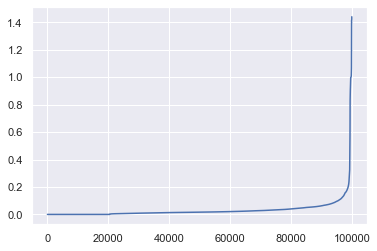

In [165]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

In [26]:
dbscan = DBSCAN(eps=0.05, min_samples=360)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=360, n_jobs=None, p=None)

In [114]:
dbscan.labels_[:5]

array([-1, 10, -1, -1,  0], dtype=int64)

In [27]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([92435,  4037,  1657,  1871], dtype=int64))

In [28]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette -0.22262973547532308


In [ ]:
# se avessi utilizzato eps e mink dato dal knee method otterrei una silhuoette di 0.4 ma ottengo 40 clusters

###### Dimensionality Reduction

In [14]:
rows2remove = np.random.choice(df.index, 70000 , replace=False)

In [15]:
dfh = df.drop(index=rows2remove, axis=0)
print(len(dfh))

30000


In [18]:
scaler = MinMaxScaler()
Y = scaler.fit_transform(dfh.values)

# Hierarchical clustering

In [19]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [20]:
#Complete Linkage

In [21]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')

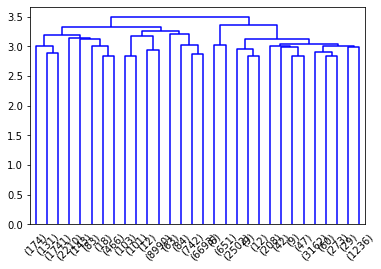

In [56]:
res = dendrogram(data_link, color_threshold=None, truncate_mode='lastp')

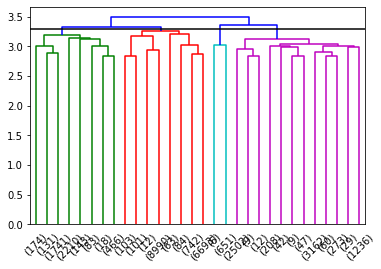

In [57]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link, ax=ax, color_threshold=3.3, truncate_mode='lastp')
threshold = 3.3 #for hline
ax.axhline(y=threshold, c='k')
plt.show()

In [83]:
# Single Linkage

In [53]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')

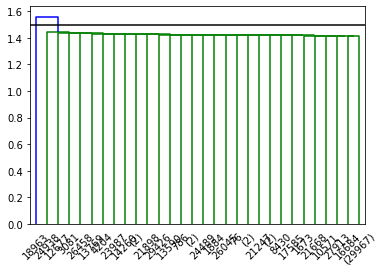

In [54]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link, ax=ax, color_threshold=1.5, truncate_mode='lastp')
threshold = 1.5
ax.axhline(y=threshold, c='k')
plt.show()


In [85]:
#Group Average Linkage

In [22]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')

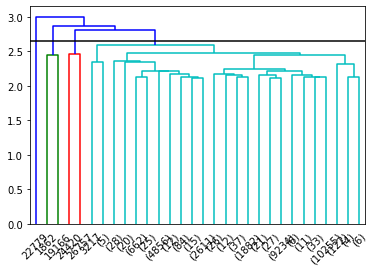

In [24]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link, ax=ax, color_threshold=2.65, truncate_mode='lastp')
threshold = 2.65 #for hline
ax.axhline(y=threshold, c='k')
plt.show()


In [25]:
data_dist = pdist(Y, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')# ward's method

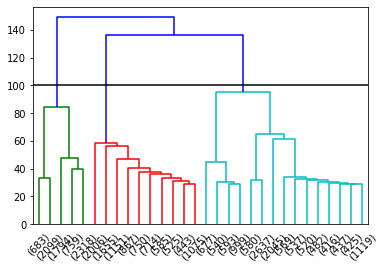

In [26]:
fig, ax = plt.subplots()

D_dendro = dendrogram(data_link, ax=ax, color_threshold=100, truncate_mode='lastp')
threshold = 100 #for hline
ax.axhline(y=threshold, c='k')
plt.show()


# CLUSTERING ANALYSIS

###### distribution of variables within the clusters

In [ ]:
#Hierarchical

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
aggl =AgglomerativeClustering(linkage='ward', distance_threshold= 100, n_clusters = None)
aggl.fit(Y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=100,
                        linkage='ward', memory=None, n_clusters=None)

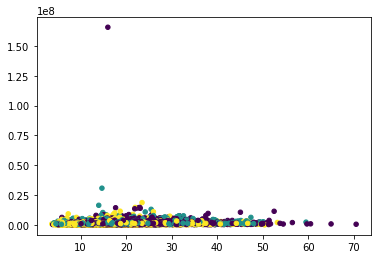

In [35]:
plt.scatter(dfh['Years of Credit History'],dfh['Annual Income'] ,c=aggl.labels_, s=20)
plt.show()

In [68]:
np.unique(aggl.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([12488,  7556,  9956], dtype=int64))

In [32]:
# K-MEANS

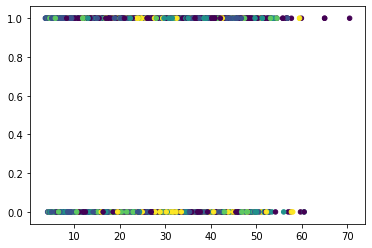

In [33]:
plt.scatter(df['Years of Credit History'],df['Loan Status'] ,c=kmeans.labels_, s=20)
plt.show()

In [34]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]),
 array([32547, 32896,  9182,  9298, 16077], dtype=int64))

In [42]:
# DBSCAN

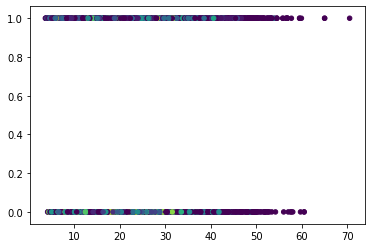

In [57]:
plt.scatter(df['Years of Credit History'],df['Loan Status'] ,c=dbscan.labels_, s=20)
plt.show()

In [58]:
np.unique(dbscan.labels_, return_counts=True)# il dbscan mi trova troppi clusters

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163], dtype=int64),
 array([21602,  7311,  1236,   342,   898,  2012,  1917,

###### centroids analysis

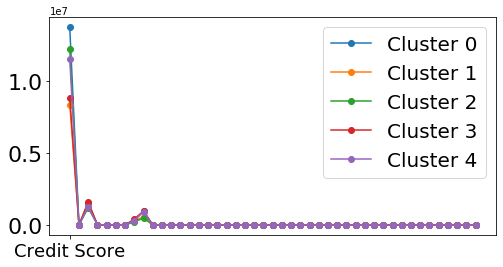

In [142]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
features = df.columns[1:2]

plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0,len(features) ), features, fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [132]:
real_feature_names

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens',
 'Term',
 'Years in current job',
 'Home Ownership',
 'Purpose']

In [128]:
features

Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
0             445412.0    709.000000   1.167493e+06       5214.74   
1             262328.0   1076.456089   1.378277e+06      33295.98   

   Years of Credit History  Number of Open Accounts  \
0                     17.2                      6.0   
1                     21.1                     35.0   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                        1.0                228190.0             416746.0   
1                        0.0                229976.0             850784.0   

   Bankruptcies  ...  Purpose=Other  Purpose=Take a Trip  \
0           1.0  ...              0                    0   
1           0.0  ...              0                    0   

   Purpose=major_purchase  Purpose=moving  Purpose=other  \
0                       0               0              0   
1                       0               0              0   

   Purpose=renewable_energy  Purpose=small_business  Purpose=vacation  \
0                         0                       0                 0   
1                         0                       0                 0   

   Purpose=wedding  Loan Status  
0                0            1  
1                0            1  

[2 rows x 45 columns]

In [135]:
features = df.columns[1:4]

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt'], dtype='object')

# Classification

In [79]:
#devo controllare se il dataset è sbilanciato per poter valutare successivamente la performance del classificatore 
#rispetto al caso banale

In [15]:
df[class_name].value_counts(),df[class_name].value_counts(normalize=True)

(1    77361
 0    22639
 Name: Loan Status, dtype: int64,
 1    0.77361
 0    0.22639
 Name: Loan Status, dtype: float64)

In [ ]:
# il trivial classifier ha un accuracy del 0.77

###### DATA PARTITIONING

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_lift_curve

In [19]:
attributes = [col for col in df.columns if col != 'Loan Status']
X = df[attributes].values
y = df['Loan Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Decision Tree

###### PARAMETER TUNING with gridsearch and cross-validation

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV

In [61]:
hyper_params_space={'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],'random_state': [0]}
tree= DecisionTreeClassifier()
search=GridSearchCV(tree,hyper_params_space)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [62]:
clf = search.best_estimator_
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [116]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [40]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

Current Loan Amount 0.0
Credit Score 1.0
Annual Income 0.0
Monthly Debt 0.0
Years of Credit History 0.0
Number of Open Accounts 0.0
Number of Credit Problems 0.0
Current Credit Balance 0.0
Maximum Open Credit 0.0
Bankruptcies 0.0
Tax Liens 0.0
Term=Long Term 0.0
Term=Short Term 0.0
Years in current job=1 year 0.0
Years in current job=10+ years 0.0
Years in current job=2 years 0.0
Years in current job=3 years 0.0
Years in current job=4 years 0.0
Years in current job=5 years 0.0
Years in current job=6 years 0.0
Years in current job=7 years 0.0
Years in current job=8 years 0.0
Years in current job=9 years 0.0
Years in current job=< 1 year 0.0
Home Ownership=Home Mortgage 0.0
Home Ownership=Own Home 0.0
Home Ownership=Rent 0.0
Purpose=Business Loan 0.0
Purpose=Buy House 0.0
Purpose=Buy a Car 0.0
Purpose=Debt Consolidation 0.0
Purpose=Educational Expenses 0.0
Purpose=Home Improvements 0.0
Purpose=Medical Bills 0.0
Purpose=Other 0.0
Purpose=Take a Trip 0.0
Purpose=major_purchase 0.0
Purpose=

In [41]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [42]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

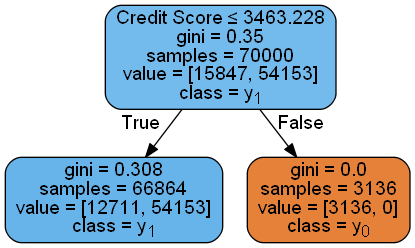

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                                feature_names=attributes, 
                                class_names=True,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [44]:
y_pred = clf.predict(X_test)

In [117]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.8184 (+/- 0.002)
F1-score: 0.6127 (+/- 0.006)


In [69]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [74]:
sm_tree_depths = range(1,10)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

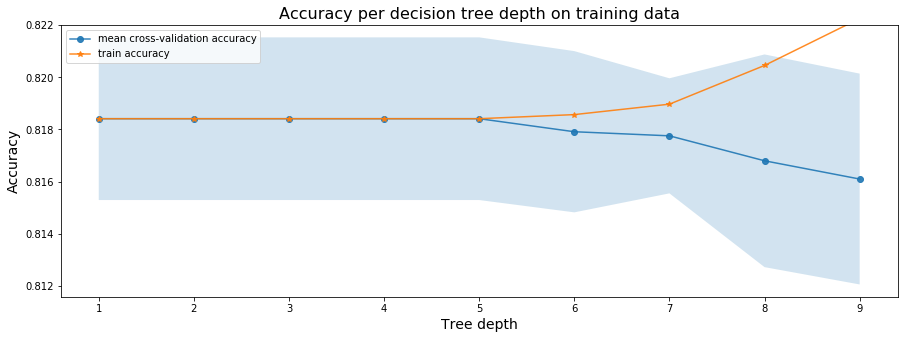

In [76]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [75]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 81.84143 +/- 0.156% on training dataset


In [ ]:
#check parameter with ransom

In [46]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [47]:
param_list = {'max_depth': [None] + list(np.arange(1, 10)),
              'min_samples_split': np.arange(2, 5),
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
              'random_state': [0]
             }

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=100)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 30, 'max_depth': 2}

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 4}

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 2, 'min_samples_leaf': 30, 'max_depth': 1}

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_depth': 3}

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 1}

Model with rank: 1
Mean validation score: 0.818 (std: 0.002)
Parameters: {'random_state': 0, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 2}

Model with rank: 1
Mean validation score: 0.818 (std: 

#### Valuto la performance

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.21      0.34      6792
           1       0.81      1.00      0.90     23208

    accuracy                           0.82     30000
   macro avg       0.91      0.60      0.62     30000
weighted avg       0.85      0.82      0.77     30000



In [57]:
confusion_matrix(y_test, y_pred)

array([[ 1415,  5377],
       [    0, 23208]], dtype=int64)

In [49]:
#roc,gains and lift chart

In [82]:
y_score=clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

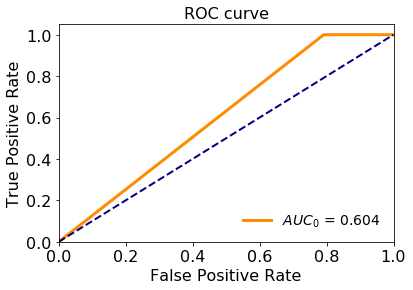

In [83]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()


In [85]:
import matplotlib.pyplot as plt
import scikitplot as skplt

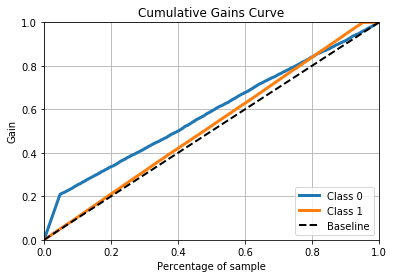

In [86]:
skplt.metrics.plot_cumulative_gain(y_test, y_score)

plt.show()

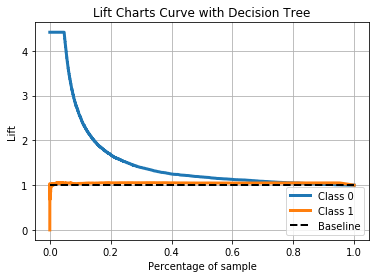

In [53]:
import scikitplot as skplt
predicted_probas_tree=clf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,predicted_probas_tree,title="Lift Charts Curve with Decision Tree")

plt.show()

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score

In [24]:
hyper_params_space={   
                   'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),
                    'random_state': [0]}
rclf = RandomForestClassifier()
search=GridSearchCV(rclf,hyper_params_space)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [25]:
rclf = search.best_estimator_
rclf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
rclf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
rclf.fit(X_train,y_train)
y_pred_r = rclf.predict(X_test)

In [27]:
scores = cross_val_score(rclf, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(rclf, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.8184 (+/- 0.00)
F1-score: 0.6127 (+/- 0.01)


In [92]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from sklearn import tree
from IPython.display import Image
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# Train
rclf.fit(X_train, y_train)
# Extract single tree
estimator = rclf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = attributes,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


###### Performance del classificatore

In [28]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_r))
print('F1-score %s' % f1_score(y_test, y_pred_r, average=None))
print(classification_report(y_test, y_pred_r))

Accuracy 0.8207666666666666
F1-score [0.34482759 0.89618288]
              precision    recall  f1-score   support

           0       1.00      0.21      0.34      6792
           1       0.81      1.00      0.90     23208

    accuracy                           0.82     30000
   macro avg       0.91      0.60      0.62     30000
weighted avg       0.85      0.82      0.77     30000



In [94]:
y_score_r=rclf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score_r[:, 1])
roc_auc0 = auc(fpr0, tpr0)

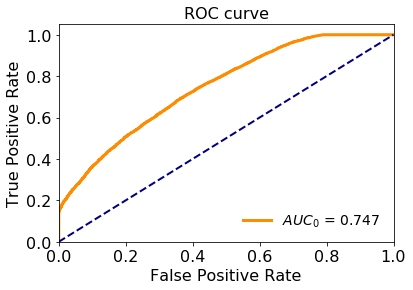

In [95]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [96]:
import matplotlib.pyplot as plt
import scikitplot as skplt

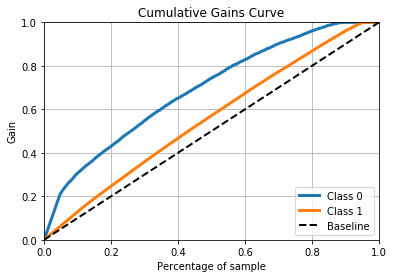

In [97]:
skplt.metrics.plot_cumulative_gain(y_test, y_score_r)

plt.show()

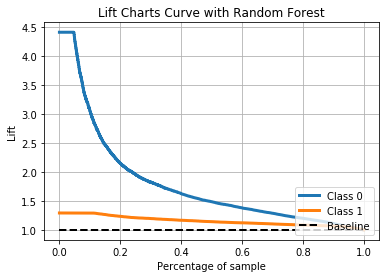

In [98]:
import scikitplot as skplt
predicted_probas_rand=rclf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,predicted_probas_rand,title="Lift Charts Curve with Random Forest")

plt.show()

# K-NearestNeighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier

###### grid search and corss validation

In [102]:
parameters = {'n_neighbors': np.arange(1, 20 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
knn = search.best_estimator_
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [27]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [28]:
y_pred_knn = knn.predict(X_test)

In [106]:
scores = cross_val_score(knn, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(knn, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.7692 (+/- 0.002)
F1-score: 0.4756 (+/- 0.004)


###### Performance knn

In [29]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.767
F1-score [0.07832278 0.86664377]
              precision    recall  f1-score   support

           0       0.38      0.04      0.08      6792
           1       0.78      0.98      0.87     23208

    accuracy                           0.77     30000
   macro avg       0.58      0.51      0.47     30000
weighted avg       0.69      0.77      0.69     30000



In [30]:
y_score_knn=knn.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score_knn[:, 1])
roc_auc0 = auc(fpr0, tpr0)

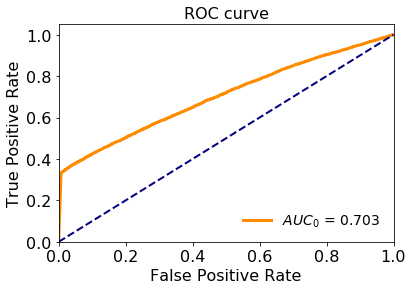

In [31]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [113]:
import matplotlib.pyplot as plt
import scikitplot as skplt

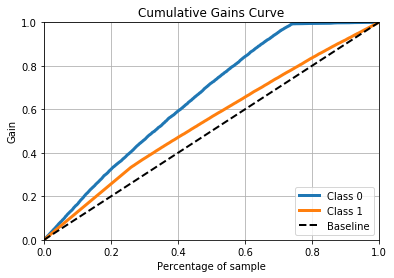

In [114]:
skplt.metrics.plot_cumulative_gain(y_test, y_score_knn)

plt.show()

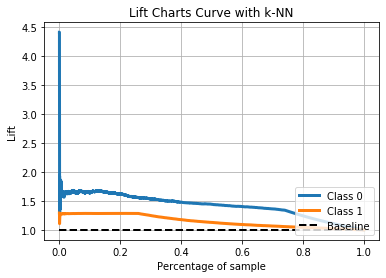

In [32]:
import scikitplot as skplt
predicted_probas_knn=knn.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test,predicted_probas_knn,title="Lift Charts Curve with k-NN")

plt.show()